### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 6
### Due: Saturday, Mar 22nd at 11.59pm CT
---

This problem has to do with density estimation and clustering. 

1. Read in `hw6_data_1.npy`. The dataset should consist of $1000$ samples with $2$ features. Note that the last column are the labels, not another feature. Make a $2$-D scatter plot of the data colored by their labels. 


2. Start with kernel density estimation on the data set. First, perform a grid search $5$-fold cross-validation to find the best bandwidth, testing $30$ bandwidths between $0.1$ and $1.0$. What is this best bandwidth? Using this best bandwidth, plot the two-dimensional kernel density estimate of the distribution. 


3. Now try a nearest neighbors approach to estimating the density. Use the Bayesian nearest neighbors option. Plot the estimated distribution. What value of $k$ neighbors do you need to make the plot look similar to your KDE distribution?


4. Now fit a Gaussian mixture model. Compute the AIC and BIC for the number of GMM components between $1$ and $10$. Plot these AIC and BIC values as a function of number of components. What is the optimal number according to the BIC? Fit the data set with this optimal number of GMM components, and create a new plot that shows the data set, the GMM component mean locations, and the $2$-sigma GMM component ellipses. *(Use the code below to help with plotting the ellipses.)*

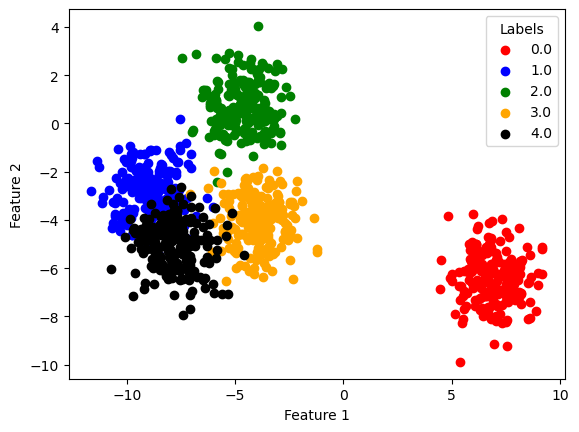

In [7]:
# PROBLEM 1

import numpy as np
import matplotlib.pyplot as plt

filename = "/Users/harvir_d/NEW_repos/astr_8070_s25/coursework/homeworks/hw_data/hw6_data_1.npy" # file path
data = np.load(filename) # easy to load multivariate data if from a numpy file

first_feature = data[:,0] # extracting column at a time
second_feature = data[:,1]
labels=data[:,2]

# Define a unique color mapping for each label
unique_labels = np.unique(labels)  # Get unique label names
color_list = ["red", "blue", "green", "orange","black"]  # Colors assigned to each label
color_map = dict(zip(unique_labels, color_list))  # Create a dictionary mapping labels to colors


fig, ax = plt.subplots()
scatters = [
    ax.scatter(first_feature[labels == label], second_feature[labels == label], c=color_map[label], label=label) 
    for label in unique_labels  # logical indexing to group points by label and associate each point with a color
]

ax.legend(title="Labels")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()


The best bandwidth: 0.4724137931034482


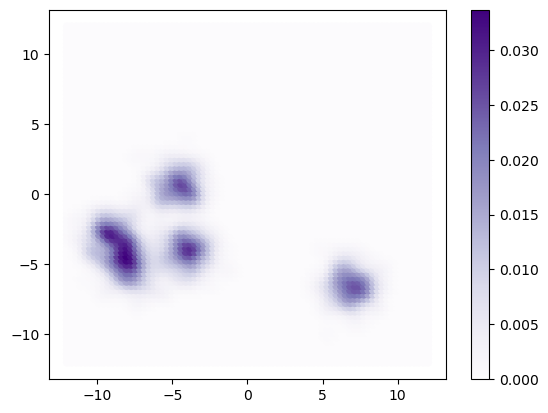

In [10]:
# PROBLEM 2

from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

bwrange = np.linspace(0.1, 1.0, 30) # Test 30 bandwidths from 0.1 to 1.0
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv=K) # Try each bandwidth with K-folds
grid.fit(data[:, 0:2])
h_opt = grid.best_params_['bandwidth']
print("The best bandwidth:", h_opt)


kde = KernelDensity(kernel='gaussian', bandwidth=h_opt)
kde.fit(data[:, 0:2]) #fit the model to the data

u = v = np.linspace(-12,12,80)
Xgrid = np.vstack(list(map(np.ravel, np.meshgrid(u, v)))).T
dens = np.exp(kde.score_samples(Xgrid)) #evaluate the model on the grid

plt.scatter(Xgrid[:,0], Xgrid[:,1], c=dens, 
            cmap="Purples", edgecolor="None")
plt.colorbar()


SRT: Good, Harvir.

/var/folders/5y/r0thn5qs437_z1rk3srjhx3r0000gn/T/ipykernel_21169/2934841732.py:40: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


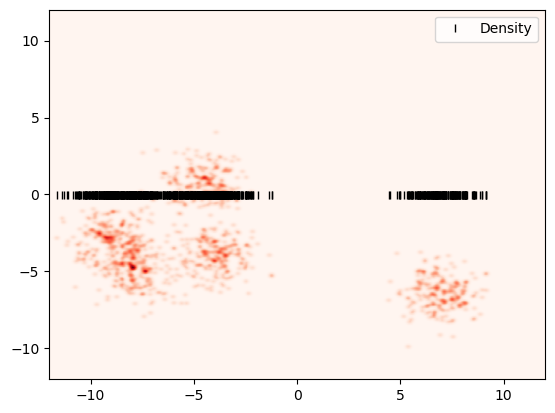

In [23]:
# PROBLEM 3

from astroML.density_estimation import KNeighborsDensity

k = 1000 # number of neighbours
N = 1000 # number of points to normalize density evaluation 

# Create a grid of points in 2D because we have two data features for each sample
feature_1_range = np.linspace(-12, 12, 1000) 
feature_2_range = np.linspace(-12, 12, 1000)  
t1, t2 = np.meshgrid(feature_1_range, feature_2_range)  # Create a mesh grid of points
t = np.vstack([t1.ravel(), t2.ravel()]).T  # Reshape to (1000000, 2) array

# Select the first two columns as the features (this assumes `data` is already defined)
xN = data[:, :2]

# Compute density with KDE
kde = KernelDensity(bandwidth=0.1, kernel='gaussian')
kde.fit(xN)  # Fit the KDE model to the data
dens_kde = np.exp(kde.score_samples(t))  # Evaluate density on the grid t

# Reshape dens_kde to match the grid dimensions for plotting
dens_kde = dens_kde.reshape(t1.shape) 

# Compute density with Bayesian nearest neighbors
nbrs = KNeighborsDensity('bayesian', n_neighbors=k)
nbrs.fit(xN)  # Fit the nearest neighbors model to the data
dens_nbrs = nbrs.eval(t) / N  # Evaluate density for 2D grid

# Reshape dens_nbrs to match the grid dimensions for plotting
dens_nbrs = dens_nbrs.reshape(t1.shape) 

# Plot the results
plt.plot(xN[:, 0], -0.005 * np.ones(len(xN)), '|k', label="Density")  # Plot data points themselves

plt.pcolormesh(t1, t2, dens_nbrs, shading='auto', cmap='Blues', label="Nearest Neighbors")  # Nearest Neighbors
plt.pcolormesh(t1, t2, dens_kde, shading='auto', cmap='Reds', label="Kernel Density (h=0.1)")  # Kernel Density

# Add legend to the plot
plt.legend(loc='upper right')
plt.show()





SRT: There's no commentary on what you found here, no evidence of experimentation with the number of nearest neighbors, and also this obviously does not look as smooth as the KDE density plot above. -5 points

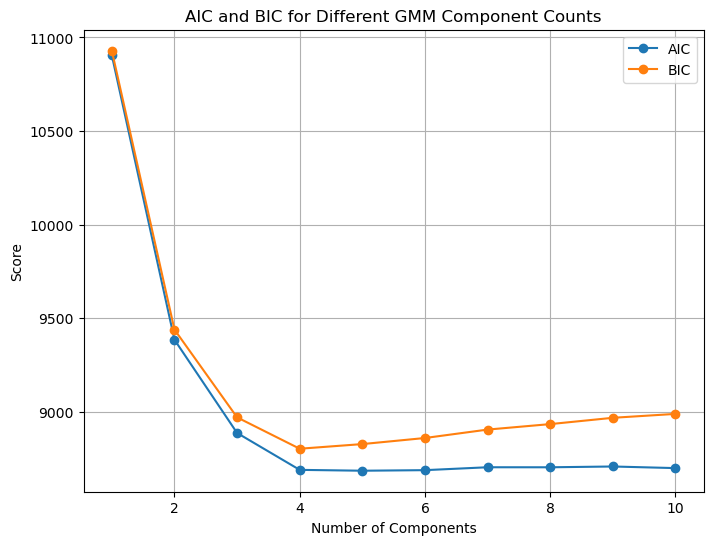

The optimal number of components according to BIC is: 4


In [25]:
# PROBLEM 4

from sklearn.mixture import GaussianMixture

xN = data[:, :2]  # Use the first two columns as features

# Lists to store AIC and BIC values
AIC = []
BIC = []

# Fit Gaussian Mixture Model (GMM) for different numbers of components (1 to 10)
for ii in range(1, 11):
    gmm = GaussianMixture(n_components=ii)  # Fit the GMM with given components
    gmm.fit(xN)  # Fit the model to the data
    
    # Compute and store AIC and BIC for the current model
    AIC.append(gmm.aic(xN))  # AIC value
    BIC.append(gmm.bic(xN))  # BIC value

# Plot the AIC and BIC values as a function of the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11), AIC, label='AIC', marker='o')
plt.plot(np.arange(1, 11), BIC, label='BIC', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Different GMM Component Counts')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Find the optimal number of components according to BIC
optimal_components_bic = np.argmin(BIC) + 1
print(f"The optimal number of components according to BIC is: {optimal_components_bic}")


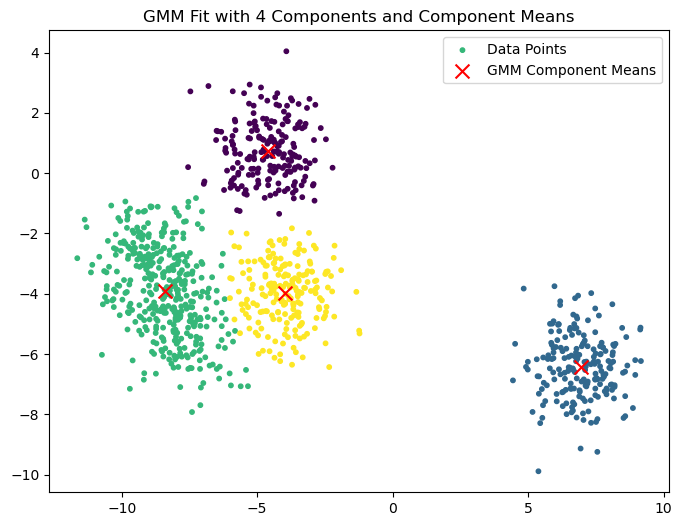

In [28]:
# PROBLEM 4 Continued

# Fit the Gaussian Mixture Model (GMM) with the optimal number of components (4 components)
gmm = GaussianMixture(n_components=4)
gmm.fit(xN)

# Predict the component labels (each point belongs to one of the 4 components)
labels = gmm.predict(xN)

# Get the means of the GMM components
means = gmm.means_

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(xN[:, 0], xN[:, 1], c=labels, cmap='viridis', s=10, label="Data Points")

# Plot the means of the components
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label="GMM Component Means")

plt.title('GMM Fit with 4 Components and Component Means')
plt.legend(loc='best')
plt.show()


SRT: Where are the covariance ellipses for each Gaussian component? I provided code for this. -3 points.

In [2]:
# Kludge to fix the bug with draw_ellipse in astroML
from matplotlib.patches import Ellipse

def draw_ellipse(mu, C, scales=[1, 2, 3], ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()

    # find principal components and rotation angle of ellipse
    sigma_x2 = C[0, 0]
    sigma_y2 = C[1, 1]
    sigma_xy = C[0, 1]

    alpha = 0.5 * np.arctan2(2 * sigma_xy,
                          (sigma_x2 - sigma_y2))
    tmp1 = 0.5 * (sigma_x2 + sigma_y2)
    tmp2 = np.sqrt(0.25 * (sigma_x2 - sigma_y2) ** 2 + sigma_xy ** 2)

    sigma1 = np.sqrt(tmp1 + tmp2)
    sigma2 = np.sqrt(tmp1 - tmp2)

    for scale in scales:
        ax.add_patch(Ellipse(xy=(mu[0], mu[1]),
                          width=2 * scale * sigma1, height=2 * scale * sigma2,
                          angle=alpha * 180. / np.pi,
                          **kwargs))

5. Now try Kmeans clustering with $5$ clusters. 
    - Use the `StandardScalar` to scale the data.
    - Fit the Kmeans model.
    - Find the cluster centers, and then inverse transform thse cluster centers back to the original unscaled coordinates.
    - Predict the labels for the scaled data.
    - Finally, make a two-panel side by side plot showing (a) the original data colored by its labels, then (b) the data colored by the Kmeans predicted labels, with cluster centers superposed.

### Solution

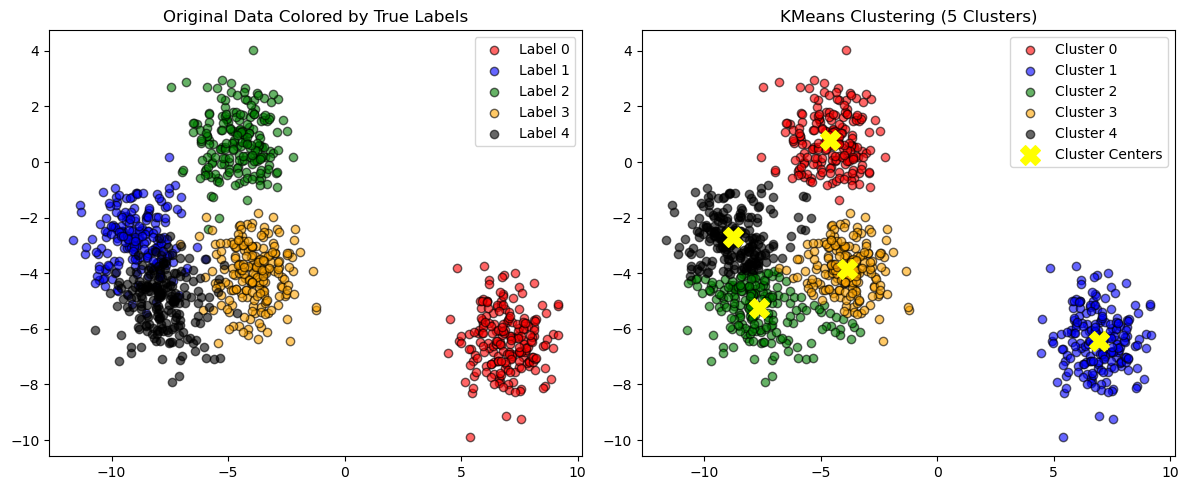

In [19]:
# PROBLEM 5

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


X = data[:, :2]  # Extract the first two columns (features)
true_labels = data[:, 2]  # Extract the true labels

# Define custom colors for both true labels and KMeans clusters
custom_colors = ['red', 'blue', 'green', 'orange', 'black']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the data

# Apply KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)  # Fit the model
cluster_centers_scaled = kmeans.cluster_centers_  # Get cluster centers in scaled space
labels = kmeans.predict(X_scaled)  # Predict cluster labels

# Inverse transform the cluster centers to original space
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

# Plot results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Panel (a): Original Data Colored by True Labels
for i, color in enumerate(custom_colors):
    mask = (true_labels == i)
    axes[0].scatter(X[mask, 0], X[mask, 1], color=color, edgecolors='k', alpha=0.6, label=f"Label {i}")

axes[0].set_title("Original Data Colored by True Labels")
axes[0].legend()

# Panel (b): Data Colored by KMeans Predicted Labels
for i, color in enumerate(custom_colors):
    mask = (labels == i)
    axes[1].scatter(X[mask, 0], X[mask, 1], color=color, edgecolors='k', alpha=0.6, label=f"Cluster {i}")

# Plot the cluster centers
axes[1].scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='yellow', marker='X', s=200, label="Cluster Centers")

axes[1].set_title("KMeans Clustering (5 Clusters)")
axes[1].legend()

plt.tight_layout()
plt.show()


SRT: Good job.

42/50